<a href="https://colab.research.google.com/github/Azimoj/Commerce/blob/main/Commerce_analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importation des librairies
import numpy as np
import pandas as pd
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


## <font color='green'>**Data transformation:**</font>

#### <font color='orange'>**Reading new dataset:**</font>

In [46]:
data_clean= pd.read_csv('/content/drive/MyDrive/Commerce_DB/data_clean.csv')

FileNotFoundError: ignored

In [4]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22927 entries, 0 to 22926
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     22927 non-null  int64  
 1   customer_Id        22927 non-null  int64  
 2   tran_date          22927 non-null  object 
 3   prod_sub_cat_code  22927 non-null  int64  
 4   prod_cat_code      22927 non-null  int64  
 5   Qty                22927 non-null  int64  
 6   Price              22927 non-null  int64  
 7   Tax                22927 non-null  float64
 8   total_amt          22927 non-null  float64
 9   Store_type         22927 non-null  object 
 10  city_code          22927 non-null  int64  
 11  city               22927 non-null  object 
 12  DOB                22927 non-null  object 
 13  Gender             22927 non-null  object 
 14  prod_cat           22927 non-null  object 
 15  prod_sub_cat       22927 non-null  object 
 16  order_status       229

In [5]:
# changing type of 'DOB' & 'tran_date' from object to date_time
data_clean['DOB'] = pd.to_datetime(data_clean['DOB'])
data_clean['tran_date'] = pd.to_datetime(data_clean['tran_date'])

In [ ]:
#data_clean['date_of_birth'] = data_clean['DOB'].apply(lambda x: x.strftime('%d/%m/%Y'))
#data_clean['date_of_birth'] = pd.to_datetime(data_clean['date_of_birth'])

In [47]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22927 entries, 0 to 22926
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     22927 non-null  int64         
 1   customer_Id        22927 non-null  int64         
 2   tran_date          22927 non-null  datetime64[ns]
 3   prod_sub_cat_code  22927 non-null  int64         
 4   prod_cat_code      22927 non-null  int64         
 5   Qty                22927 non-null  int64         
 6   Price              22927 non-null  int64         
 7   Tax                22927 non-null  float64       
 8   total_amt          22927 non-null  float64       
 9   Store_type         22927 non-null  object        
 10  city_code          22927 non-null  int64         
 11  city               22927 non-null  object        
 12  DOB                22927 non-null  datetime64[ns]
 13  Gender             22927 non-null  object        
 14  prod_c

In [ ]:
data_clean.describe()

,transaction_id,customer_Id,prod_sub_cat_code,prod_cat_code,Qty,Price,Tax,total_amt,city_code,client_age
count,2.292700e+04,22927.000000,22927.000000,22927.000000,22927.000000,22927.000000,22927.000000,22927.000000,22927.000000,22927.000000
mean,5.005818e+10,271023.015353,6.149823,3.763423,2.460505,643.791381,248.640156,2132.258548,5.480700,32.123086
std,2.898748e+10,2431.368070,3.725385,1.677096,2.238018,614.635963,187.094898,2485.388422,2.863625,6.637860
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000,21.000000
25%,2.487848e+10,268938.000000,3.000000,2.000000,1.000000,318.000000,98.280000,777.920000,3.000000,26.000000
50%,5.008377e+10,270981.000000,5.000000,4.000000,3.000000,715.000000,199.080000,1773.525000,5.000000,32.000000
75%,7.531544e+10,273115.000000,10.000000,5.000000,4.000000,1111.000000,365.400000,3584.620000,8.000000,38.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,10.000000,44.000000


### **Order status**

Text(0.5, 1.0, 'Order status')

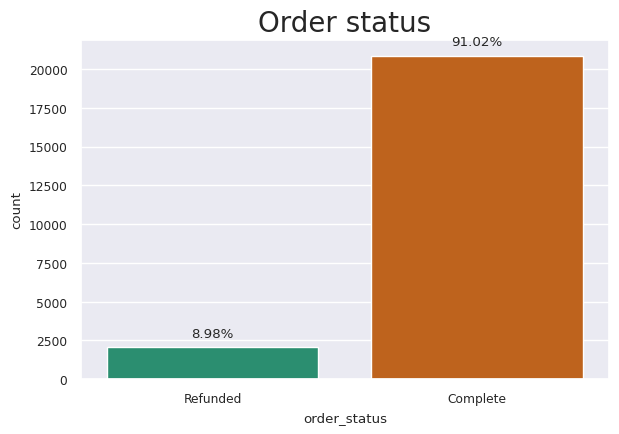

In [9]:
sns.set(font_scale=0.8)
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
ax= sns.countplot(x="order_status", data=data_clean, palette='Dark2')
total = len(data_clean['order_status'])

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Order status", fontsize=20)

### <font color='blue'>**Client analysis on refunded product:**</font>


In [10]:
df_refund= data_clean[data_clean["order_status"]=='Refunded']

In [11]:
df_refund.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 22908
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     2059 non-null   int64         
 1   customer_Id        2059 non-null   int64         
 2   tran_date          2059 non-null   datetime64[ns]
 3   prod_sub_cat_code  2059 non-null   int64         
 4   prod_cat_code      2059 non-null   int64         
 5   Qty                2059 non-null   int64         
 6   Price              2059 non-null   int64         
 7   Tax                2059 non-null   float64       
 8   total_amt          2059 non-null   float64       
 9   Store_type         2059 non-null   object        
 10  city_code          2059 non-null   int64         
 11  city               2059 non-null   object        
 12  DOB                2059 non-null   datetime64[ns]
 13  Gender             2059 non-null   object        
 14  prod_ca

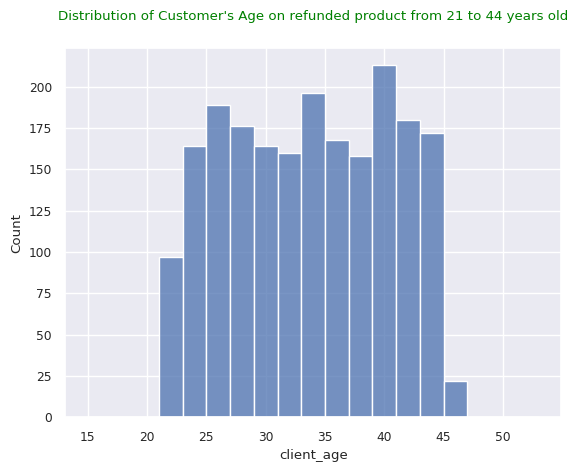

In [12]:
sns.histplot(data=df_refund, x="client_age", bins = list(range(15, 55, 2)))
plt.title("Distribution of Customer's Age on refunded product from 21 to 44 years old", color='green', pad=20)
sns.set(font_scale=1.1)

Text(0.5, 1.0, 'Sub-product category for refunded product')

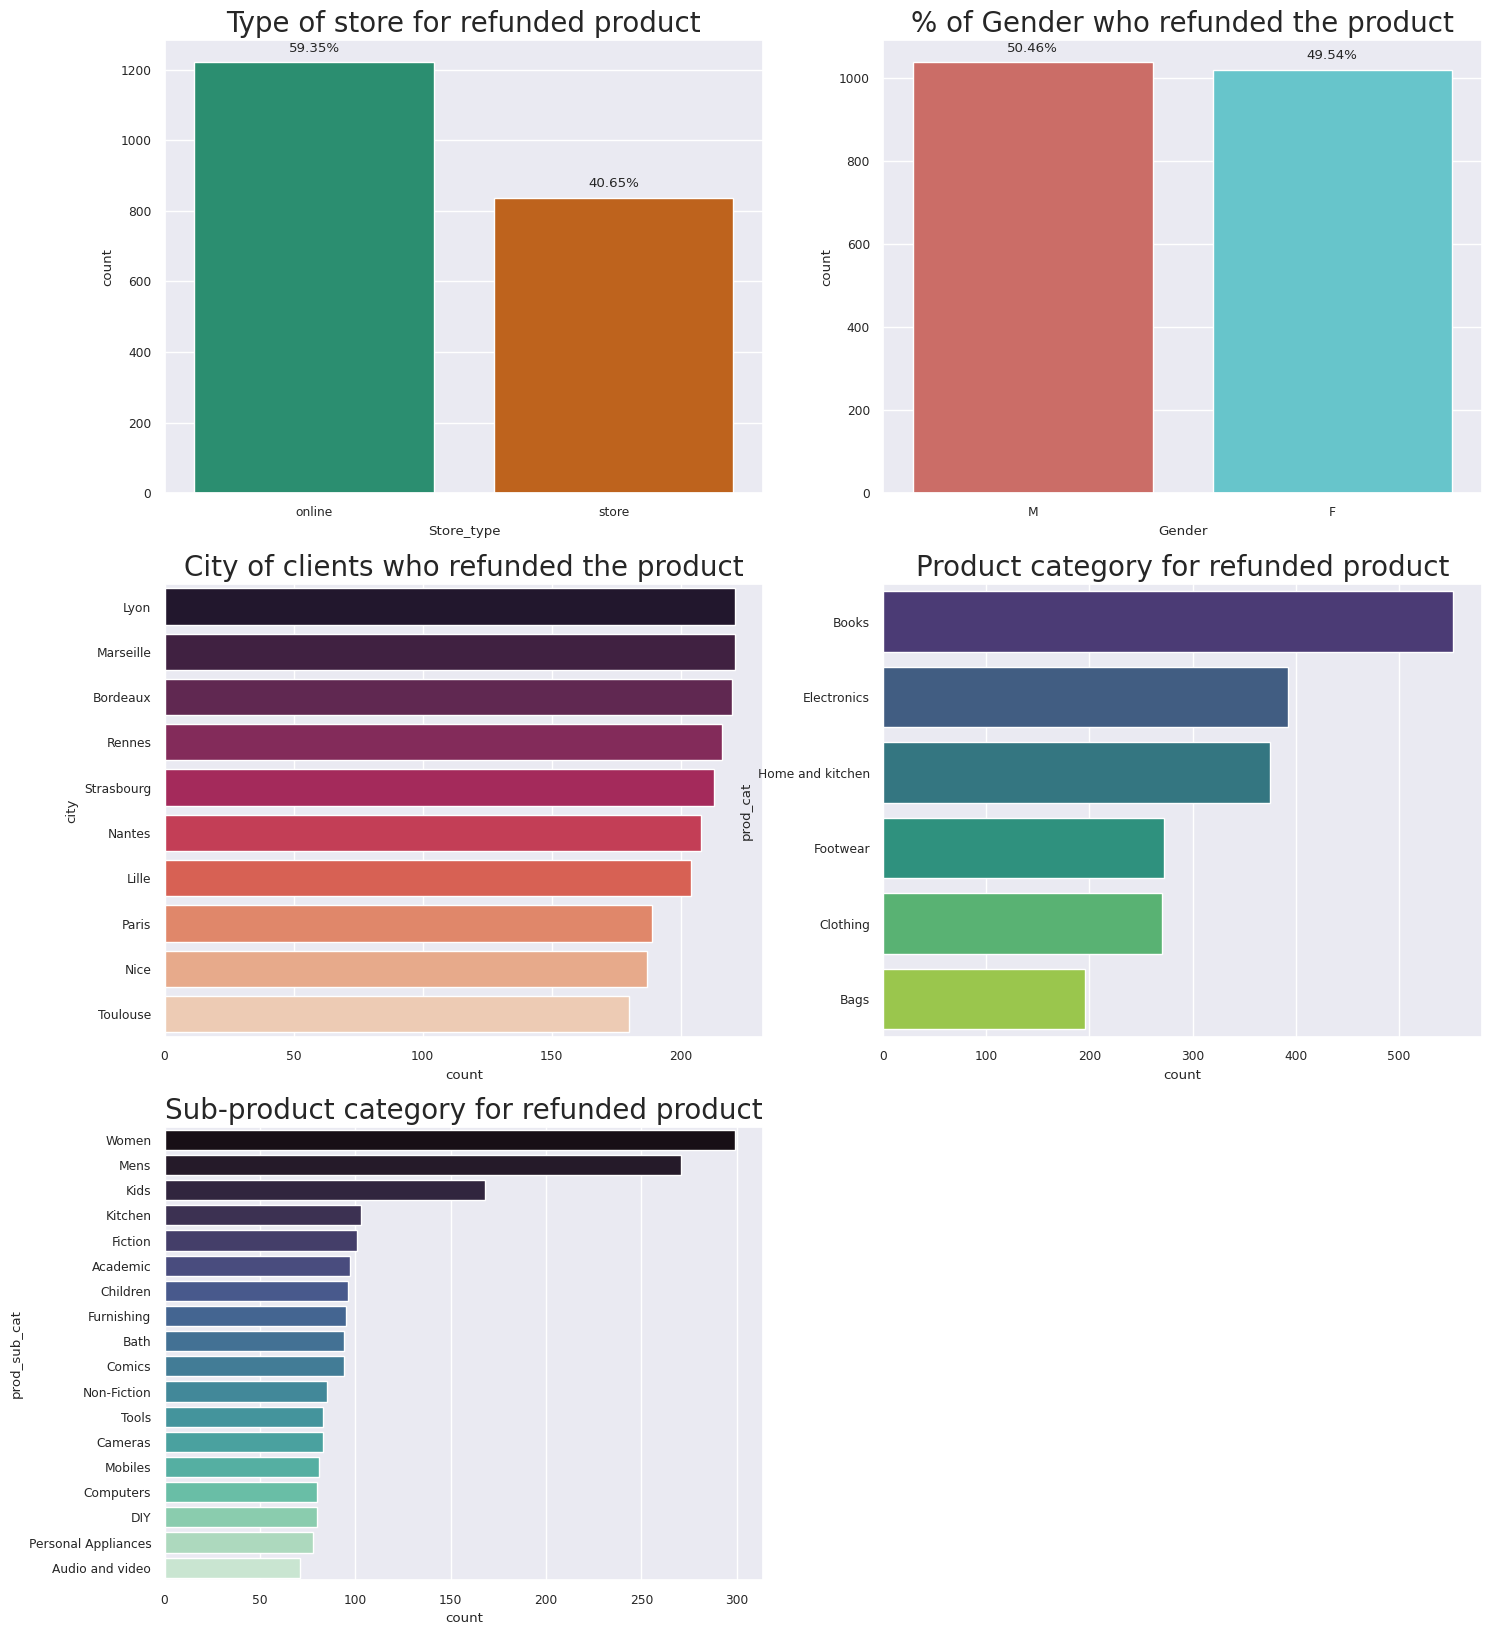

In [13]:
sns.set(font_scale=0.8)
plt.figure(figsize=(17,20))

plt.subplot(3,2,1)
ax1= sns.countplot(x="Store_type", data=df_refund, palette='Dark2')
total1 = len(df_refund['Store_type'])

for p in ax1.patches:
    ax1.annotate('{:.2f}%'.format(100 * p.get_height()/total1), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Type of store for refunded product", fontsize=20)

plt.subplot(3,2,2)
ax2= sns.countplot(x="Gender", data=df_refund, palette="hls")
total2 = len(df_refund['Gender'])

for p in ax2.patches:
    ax2.annotate('{:.2f}%'.format(100 * p.get_height()/total2), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("% of Gender who refunded the product", fontsize=20)


plt.subplot(3,2,3)
sns.countplot(y=df_refund['city'], palette='rocket',
                   order = df_refund['city'].value_counts().index[:10], data=df_refund)
plt.title("City of clients who refunded the product", fontsize=20)



plt.subplot(3,2,4)
sns.countplot(y="prod_cat", data=df_refund, palette='viridis',
                   order = df_refund['prod_cat'].value_counts().index[:10])
plt.title("Product category for refunded product", fontsize=20)


plt.subplot(3,2,5)
sns.countplot(y="prod_sub_cat", data=df_refund, palette='mako',
                   order = df_refund['prod_sub_cat'].value_counts().index[:20])
plt.title("Sub-product category for refunded product", fontsize=20)

### <font color='blue'>**Dividing dataset in two parts (unique_transaction & multiple_transactions):**</font>

In [14]:
data_clean.columns

Index(['transaction_id', 'customer_Id', 'tran_date', 'prod_sub_cat_code',
       'prod_cat_code', 'Qty', 'Price', 'Tax', 'total_amt', 'Store_type',
       'city_code', 'city', 'DOB', 'Gender', 'prod_cat', 'prod_sub_cat',
       'order_status', 'client_age'],
      dtype='object')

In [15]:
data_clean.transaction_id.value_counts()

80712190438    2
89777842340    2
28621201753    2
46036200293    2
74355594801    2
              ..
74244457286    1
65467518006    1
94174237977    1
66102349304    1
83245680995    1
Name: transaction_id, Length: 20870, dtype: int64

In [19]:
df_trans= data_clean.transaction_id.value_counts().reset_index()
df_trans

,index,transaction_id
0,80712190438,2
1,89777842340,2
2,28621201753,2
3,46036200293,2
4,74355594801,2
...,...,...
20865,74244457286,1
20866,65467518006,1
20867,94174237977,1
20868,66102349304,1


In [39]:
# unique transaction
unique_orders= df_trans[df_trans['transaction_id']==1]['index'].unique()
unique_orders

array([14765653197, 42276782131, 78955533181, ..., 94174237977,
       66102349304, 83245680995])

In [40]:
df_unique_transaction= data_clean[data_clean['transaction_id'].isin(unique_orders)]
df_unique_transaction.shape

(18813, 18)

In [41]:
# more than one tranaction
multiple_transactions = df_trans[df_trans['transaction_id']> 1]['index'].unique()
multiple_transactions

array([80712190438, 89777842340, 28621201753, ..., 58350921139,
       56454025977, 51946589837])

In [42]:
df_multiple_transactions= data_clean[data_clean['transaction_id'].isin(multiple_transactions)]
df_multiple_transactions.shape

(4114, 18)

In [45]:
df_multiple_transactions.to_csv('/content/drive/My Drive/Commerce_DB/df_multiple_transactions.csv', index=False)

df_unique_transaction.to_csv('/content/drive/My Drive/Commerce_DB/df_unique_transaction.csv', index=False)

### <font color='blue'>**Client analysis on unique tranaction:**</font>

Text(0.5, 1.0, 'Sub-product category')

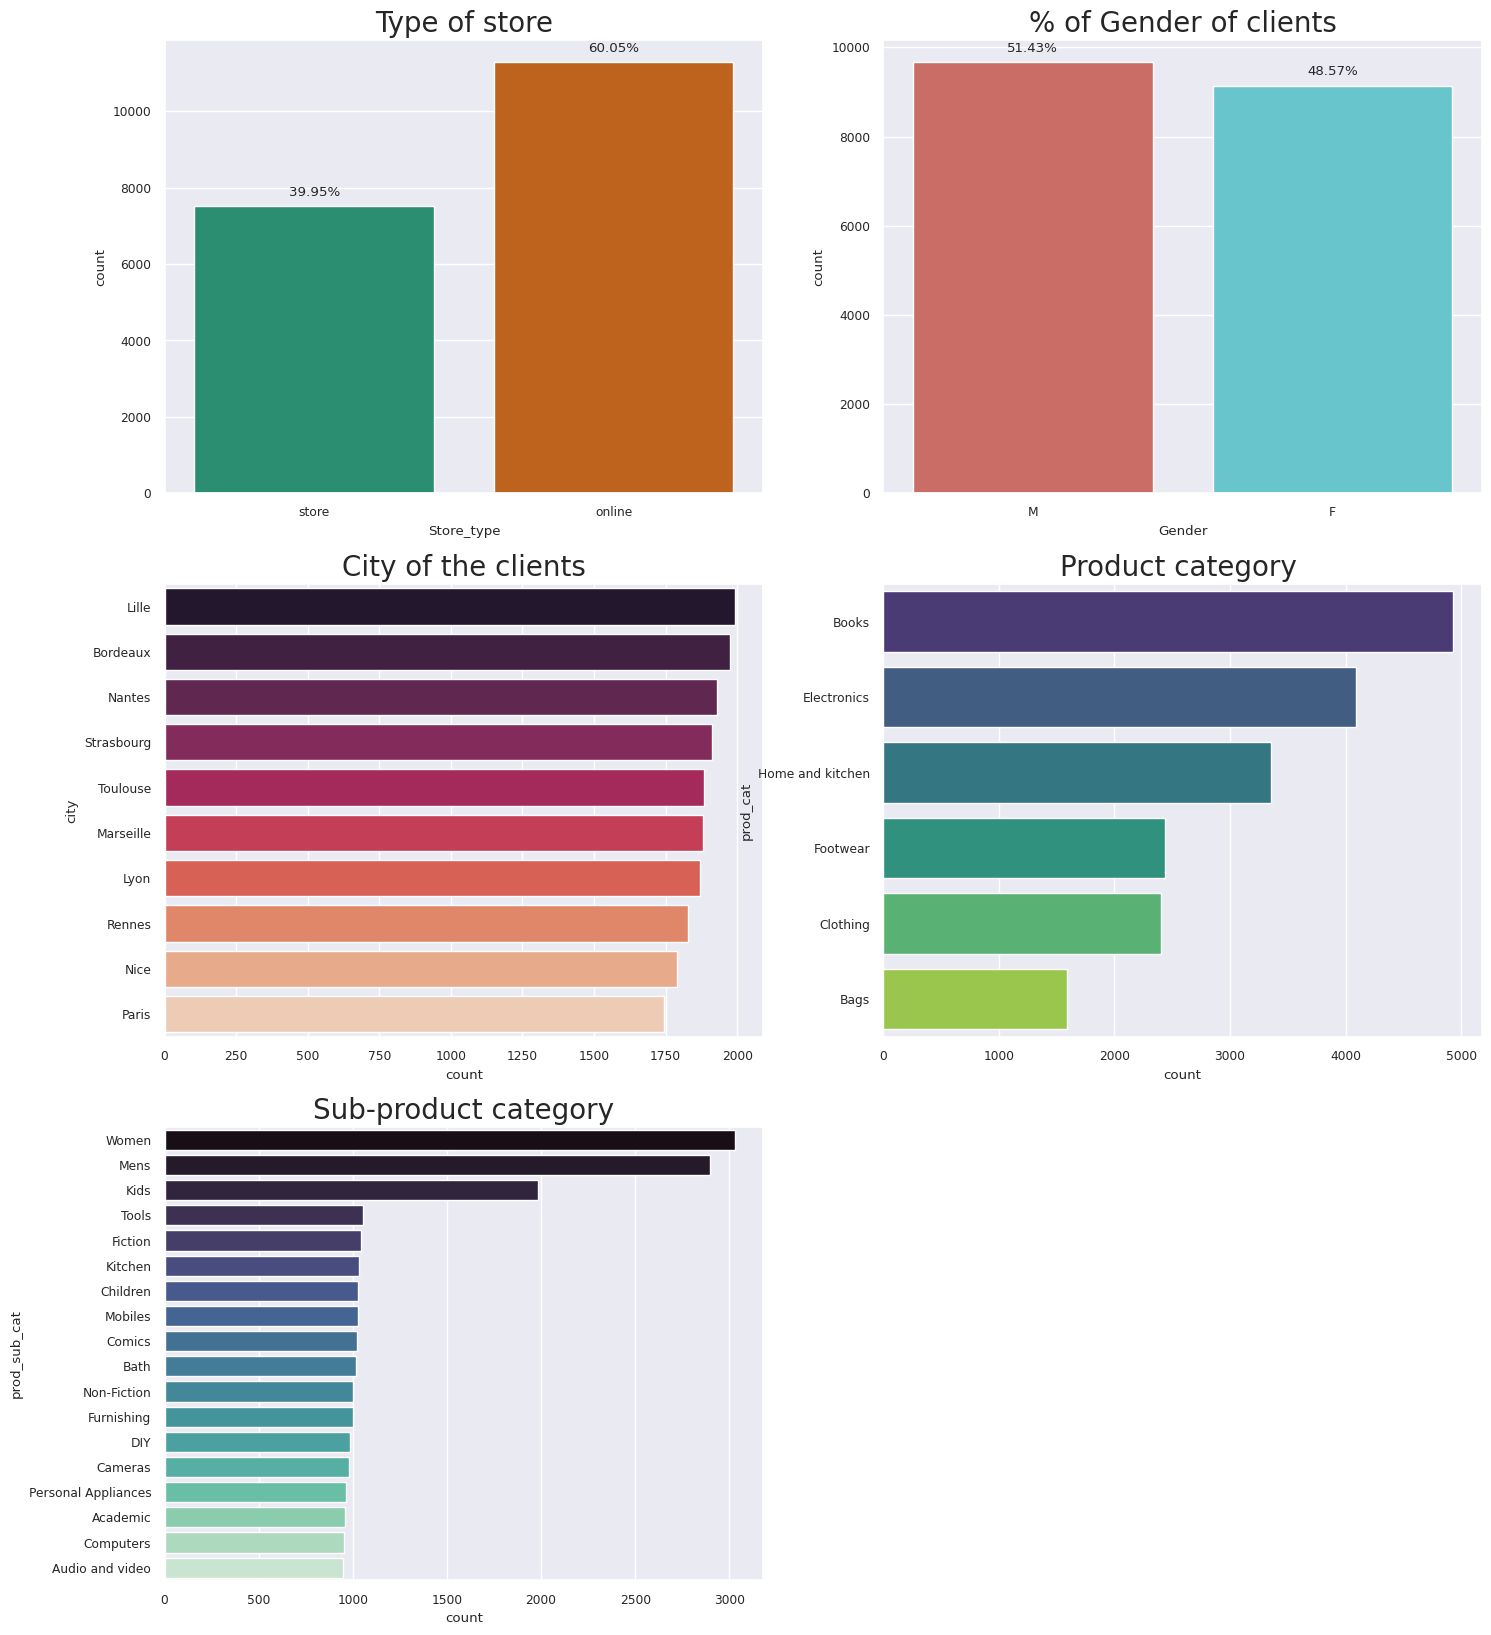

In [48]:
sns.set(font_scale=0.8)
plt.figure(figsize=(17,20))

plt.subplot(3,2,1)
ax1= sns.countplot(x="Store_type", data=df_unique_transaction, palette='Dark2')
total1 = len(df_unique_transaction['Store_type'])

for p in ax1.patches:
    ax1.annotate('{:.2f}%'.format(100 * p.get_height()/total1), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Type of store", fontsize=20)

plt.subplot(3,2,2)
ax2= sns.countplot(x="Gender", data=df_unique_transaction, palette="hls")
total2 = len(df_unique_transaction['Gender'])

for p in ax2.patches:
    ax2.annotate('{:.2f}%'.format(100 * p.get_height()/total2), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("% of Gender of clients", fontsize=20)


plt.subplot(3,2,3)
sns.countplot(y=df_unique_transaction['city'], palette='rocket',
                   order = df_unique_transaction['city'].value_counts().index[:10], data=df_unique_transaction)
plt.title("City of the clients", fontsize=20)



plt.subplot(3,2,4)
sns.countplot(y="prod_cat", data=df_unique_transaction, palette='viridis',
                   order = df_unique_transaction['prod_cat'].value_counts().index[:10])
plt.title("Product category ", fontsize=20)


plt.subplot(3,2,5)
sns.countplot(y="prod_sub_cat", data=data_clean, palette='mako',
                   order = data_clean['prod_sub_cat'].value_counts().index[:20])
plt.title("Sub-product category", fontsize=20)

### <font color='blue'>**Analyse of client "year & month & day of week":**</font>

In [49]:
df_unique_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18813 entries, 2 to 22926
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     18813 non-null  int64         
 1   customer_Id        18813 non-null  int64         
 2   tran_date          18813 non-null  datetime64[ns]
 3   prod_sub_cat_code  18813 non-null  int64         
 4   prod_cat_code      18813 non-null  int64         
 5   Qty                18813 non-null  int64         
 6   Price              18813 non-null  int64         
 7   Tax                18813 non-null  float64       
 8   total_amt          18813 non-null  float64       
 9   Store_type         18813 non-null  object        
 10  city_code          18813 non-null  int64         
 11  city               18813 non-null  object        
 12  DOB                18813 non-null  datetime64[ns]
 13  Gender             18813 non-null  object        
 14  prod_c

In [50]:
# making new columns for year & month
df_unique_transaction['tran_date_year'] = df_unique_transaction['tran_date'].apply(lambda x: x.year)
df_unique_transaction['tran_date_month'] = df_unique_transaction['tran_date'].apply(lambda x: x.month)

In [51]:
# Creating a new columns with the name of month
df_unique_transaction['tran_date_month_name'] = df_unique_transaction['tran_date'].apply(lambda x: x.strftime('%b'))

In [52]:
df_unique_transaction['tran_date_year_month'] = df_unique_transaction['tran_date'].apply(lambda x: x.strftime('%Y%m'))

In [53]:
# Extracting attributes for purchase date - Day and Day of Week
df_unique_transaction['tran_date_day'] = df_unique_transaction['tran_date'].apply(lambda x: x.day)
df_unique_transaction['tran_date_dayofweek'] = df_unique_transaction['tran_date'].apply(lambda x: x.dayofweek)
df_unique_transaction['tran_date_dayofweek_name'] = df_unique_transaction['tran_date'].apply(lambda x: x.strftime('%a'))

In [54]:
df_unique_transaction.head(3)

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Price,Tax,total_amt,Store_type,...,prod_sub_cat,order_status,client_age,tran_date_year,tran_date_month,tran_date_month_name,tran_date_year_month,tran_date_day,tran_date_dayofweek,tran_date_dayofweek_name
2,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,store,...,Women,Complete,33,2013,12,Dec,201312,16,0,Mon
5,4737317330,269345,2011-07-29,1,1,5,1141,599.025,6304.025,store,...,Women,Complete,44,2011,7,Jul,201107,29,4,Fri
6,44425889101,274987,2012-03-18,1,1,4,897,376.740,3964.740,store,...,Women,Complete,31,2012,3,Mar,201203,18,6,Sun


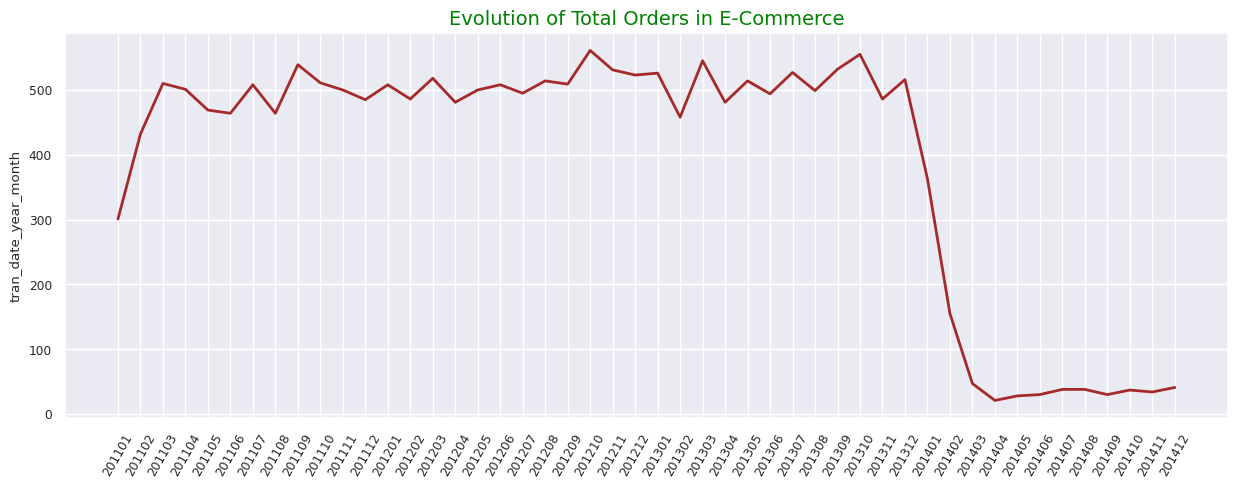

In [55]:
plt.figure(figsize=(15,5))
sns.lineplot(data = df_unique_transaction['tran_date_year_month'].value_counts().sort_index(),color='brown', linewidth=2 )
plt.title("Evolution of Total Orders in E-Commerce", fontsize=20, size=14, color='green')
plt.xticks(rotation  = 60)
sns.set(font_scale=1.1)

Text(0, 0.5, 'Count')

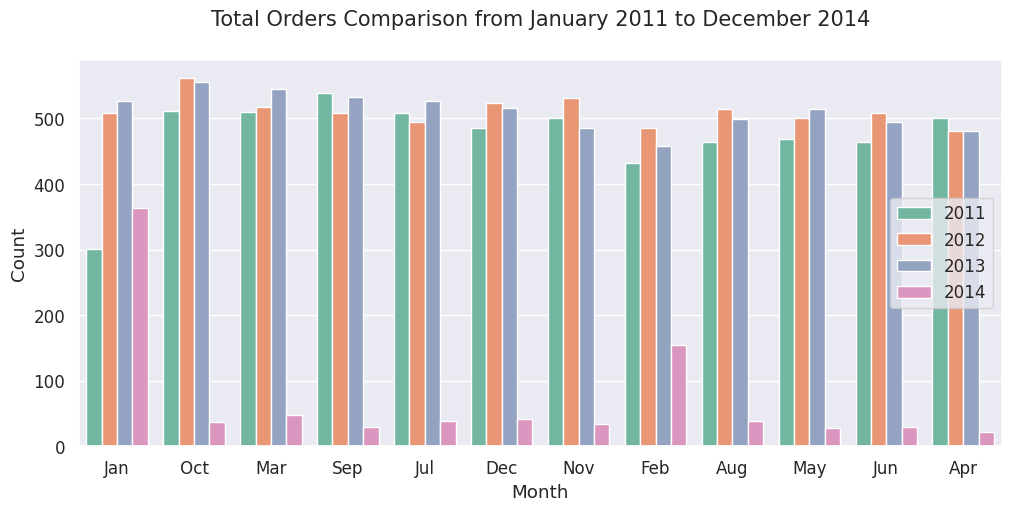

In [57]:
# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(10, 5))

sns.countplot(data= df_unique_transaction, x='tran_date_month_name', hue='tran_date_year',palette = "Set2",
               order = df_unique_transaction['tran_date_month_name'].value_counts().index)

plt.title('Total Orders Comparison from January 2011 to December 2014', size=15, pad=25)

plt.legend(loc='center right')
plt.xlabel('Month')
plt.ylabel('Count')

Text(0.5, 1.0, 'Total Orders by Day of Week')

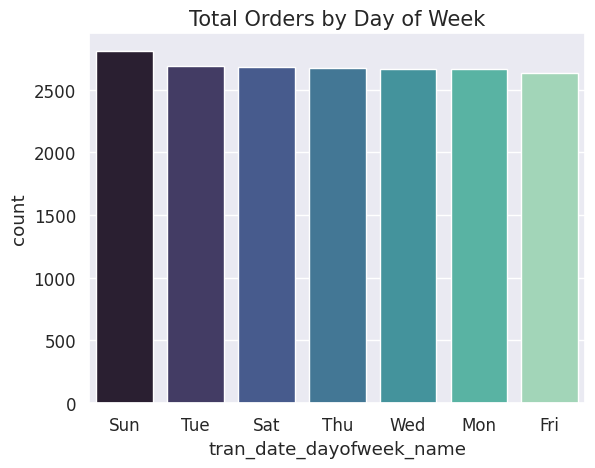

In [58]:
sns.countplot(x="tran_date_dayofweek_name", data=df_unique_transaction, palette='mako',
                   order = df_unique_transaction['tran_date_dayofweek_name'].value_counts().index[:15])
plt.title("Total Orders by Day of Week", fontsize=15)

In [59]:
cust_tot_amt = df_unique_transaction.groupby(['customer_Id']).agg({'total_amt': 'sum'})

In [60]:
cust_tot_amt

,total_amt
customer_Id,
266783,3113.890
266784,5694.065
266785,21613.800
266788,6092.970
266794,27981.915
...,...
275257,12574.900
275261,442.000
275262,5078.580


### <font color='blue'>**RFM segmentation:**</font>

In [61]:
NOW = datetime(2015,3,1)

rfmTable = df_unique_transaction.groupby('customer_Id').agg({'tran_date': lambda x: ((NOW - x.max()).days) , # Recency
                                        'transaction_id': lambda x: len(x),      # Frequency
                                        'total_amt': lambda x: x.sum()}).reset_index() # Monetary Value

# rfmTable['order_purchase_timestamp'] = rfmTable['order_purchase_timestamp'].astype(int)
rfmTable.rename(columns={'tran_date': 'Recency',
                         'transaction_id': 'Frequency',
                         'total_amt': 'Monetary'}, inplace=True)

In [62]:

rfmTable.head()

,customer_Id,Recency,Frequency,Monetary
0,266783,545,3,3113.890
1,266784,903,3,5694.065
2,266785,746,6,21613.800
3,266788,454,4,6092.970
4,266794,89,10,27981.915


In [64]:
rfmTable.to_csv('/content/drive/My Drive/Commerce_DB/RFM_Table.csv', index=False)